In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
# TODO 1
!pip install xlrd==1.2.0
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',index_col=0)
df.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


In [3]:
# TODO 2
df1 = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',index_col=0)
for col in df.columns:
  if col == 'Genotype' or col == 'Treatment' or col == 'Behavior' or col == 'class' or col == 'MouseID':
    df1[col] = df1[col].dropna()
  else:
    df1[col] = df1[col].fillna(df[col].mean())
df1.head(6)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m


In [4]:
# TODO 3
yraw = np.array(df1['Genotype'])
#Control 1, another 0
y = (yraw == 'Control').astype(int)

In [5]:
# TODO 4
nrow = df1.shape[0]
ncol = df1.shape[1]
xname = []
for i in range(ncol-4):
  xname.append(df1.columns[i])
X = np.array(df1[xname])
print(xname)
print(X)

['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
[[0.50364388 0.74719322 0.4301753  ... 0.13179003 0.1281856  1.67565235]
 [0.51461708 0.68906355 0.41177034 ... 0.13510297 0.1311187  1.74360965]
 [0.50918309 0.7302468  0.41830878

In [6]:
from sklearn.model_selection import train_test_split
# Use : shuffle=True, random_state=3 so we all can have same split.
# TODO 5:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3,shuffle=True, random_state=3) 

In [7]:
from sklearn.preprocessing import StandardScaler
# TODO 6
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)

In [8]:
# TODO 7
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(Xtr1,ytr)

LogisticRegression(C=100000.0, solver='liblinear')

In [9]:
# TODO 8
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.947531


<StemContainer object of 3 artists>

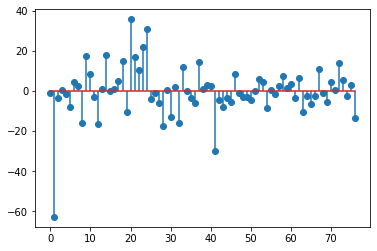

In [10]:
# TODO 9
W = logreg.coef_.ravel()
plt.stem(W,use_line_collection=True)

In [11]:
# TODO 10
I = np.argsort(np.abs(W))
I = np.flipud(I)
print("largest component:{}, second largest component:{}".format(xname[I[0]],xname[I[1]]))

largest component:ITSN1_N, second largest component:BRAF_N


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
# TODO 11
acc = np.zeros(nfold)
prec = np.zeros(nfold)
rec = np.zeros(nfold)
f1 = np.zeros(nfold)

for i, I in enumerate(kf.split(X)):
    train, test = I
    Xtr_i = X[train,:]
    ytr_i = y[train]
    Xts_i = X[test,:]
    yts_i = y[test]

    scal = StandardScaler()
    Xtr1_i = scal.fit_transform(Xtr_i)
    Xts1_i = scal.transform(Xts_i)    
       
    logreg.fit(Xtr1_i, ytr_i)
    
    yhat = logreg.predict(Xts1_i)
    acc[i] = np.mean(yhat == yts_i)
    
    prec[i],rec[i],f1[i],_  = precision_recall_fscore_support(yts_i,yhat,average='binary') 
    

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
errm= np.mean(1-acc)

print('Precision = {0:.4f}'.format(precm))
print('Recall =    {0:.4f}'.format(recm))
print('F1 score =  {0:.4f}'.format(f1m))
print('Error rate =  {0:.4f}'.format(errm))

Precision = 0.9586
Recall =    0.9479
F1 score =  0.9531
Error rate =  0.0472


In [13]:
# TODO 12
map_dict = {}
_,index = np.unique(df1['class'].values,return_index=True)
for key, value in enumerate(df1['class'][np.sort(index)],start=0):
  map_dict[value] = key
y = np.array(df1['class'].map(map_dict))
print(y)

[0 0 0 ... 7 7 7]


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# TODO 13
#logreg1 =  linear_model.LogisticRegression()
#logreg1.fit(X,y)
C = np.zeros((8,8))
accs = np.zeros(nfold)
logreg1 = linear_model.LogisticRegression(C=1e5,solver='liblinear')
for i, I in enumerate(kf.split(X)):
    train, test = I
    Xtr_i = X[train,:]
    ytr_i = y[train]
    Xts_i = X[test,:]
    yts_i = y[test]

    scal = StandardScaler()
    Xtr1_i = scal.fit_transform(Xtr_i)
    Xts1_i = scal.transform(Xts_i)    

    logreg1.fit(Xtr1_i, ytr_i)

    yhat = logreg1.predict(Xts1_i)
    C = C + confusion_matrix(yts_i,yhat)
    accs[i] = np.mean(yhat == yts_i)

s = np.sum(C,axis = 1)
for i in range(C.shape[0]):
  C[i] = C[i]/s[i]
print(np.array_str(C, precision=4, suppress_small=True))
accm = np.mean(accs)
acc_se = np.std(accs)/np.sqrt(nfold-1)
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

[[0.9867 0.     0.0133 0.     0.     0.     0.     0.    ]
 [0.     0.98   0.0133 0.0067 0.     0.     0.     0.    ]
 [0.0296 0.     0.9556 0.     0.0074 0.0074 0.     0.    ]
 [0.0074 0.     0.     0.9926 0.     0.     0.     0.    ]
 [0.     0.     0.0148 0.     0.9852 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
Accuracy =  0.9870, SE=0.0028


<StemContainer object of 3 artists>

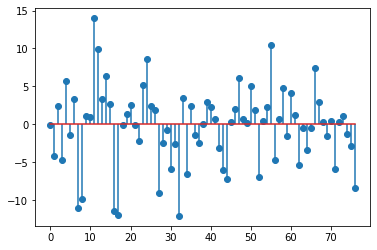

In [15]:
# TODO 14
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3,shuffle=True, random_state=3) 
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)
logreg1.fit(Xtr1,ytr)
W = logreg1.coef_
plt.stem(W[0],use_line_collection=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


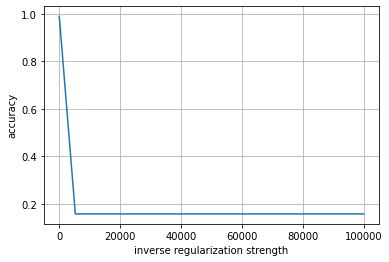

Accuracy without regularization =  0.9870
Optimal accuracy with regularization =  1.0000


In [16]:
# TODO 15
strengths = np.logspace(1e-4,1e5,20)
nstrength = len(strengths)

# Run the cross-validation 10-fold
accs2 = np.zeros((nstrength, nfold))
for ifold, ind in enumerate(kf.split(X)):
    train, test = I
    Xtr_i = X[train,:]
    ytr_i = y[train]
    Xts_i = X[test,:]
    yts_i = y[test]

    scal = StandardScaler()
    Xtr1_i = scal.fit_transform(Xtr_i)
    Xts1_i = scal.transform(Xts_i) 

    for i, strength in enumerate(strengths):
        logreg2 = linear_model.LogisticRegression(C=strength,solver='liblinear',penalty='l1')
        logreg2.fit(Xtr1_i,ytr_i)

        yhat = logreg2.predict(Xts1_i)
        accs2[i,ifold] = np.mean(yhat == yts_i)

acc_lasso_mean = np.mean(accs2, axis=1)
acc_lasso_se  = np.std(accs2, axis=1) / np.sqrt(nfold-1)

xp = np.linspace(1e-4,1e5,20)
plt.plot(xp,acc_lasso_mean)
plt.xlabel('inverse regularization strength')
plt.ylabel('accuracy')
plt.grid()
plt.show()

im = np.argmax(acc_lasso_mean)
strength_op = strengths[im]
logreg_op = linear_model.LogisticRegression(C=strength_op,solver='liblinear',penalty='l1')
logreg_op.fit(Xtr1,ytr)
yhat_op = logreg_op.predict(Xts1)
acc_op = np.mean(yhat_op == yts)

accm_new = np.mean(accs2)
acc_se_new = np.std(accs2)/np.sqrt(nfold-1)
print('Accuracy without regularization =  {0:.4f}'.format(accm))
print('Optimal accuracy with regularization =  {0:.4f}'.format(acc_op))